In [ ]:
import requests
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.12/site-packages/seaborn/_statistics.py:32: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.2)
  from scipy.stats import gaussian_kde


[*********************100%***********************]  1 of 1 completed


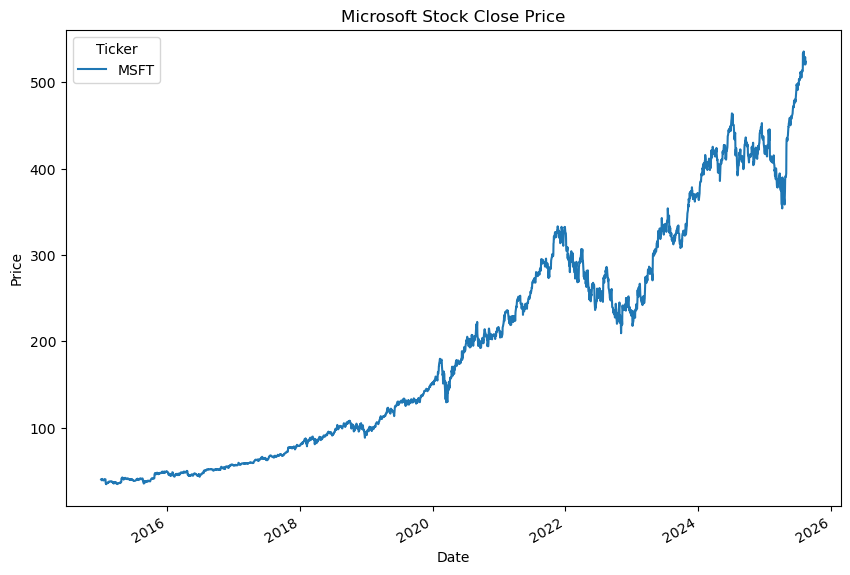

[*********************100%***********************]  1 of 1 completed


In [32]:
data_msft = yf.download('MSFT', '2015-01-01', auto_adjust=True)
data_msft['Close'].plot(figsize=(10,7))
plt.title('Microsoft Stock Close Price')
plt.ylabel('Price')
plt.show()

data_msft_1m = yf.download(tickers="MSFT", period="5d", interval="1m", auto_adjust=True,multi_level_index=False)


In [8]:
# Define the ticker list
tickers_list = ['AAPL', 'AMZN', 'MSFT']

# Download the data for the above tickers and extract the Adj Close column
price_data = yf.download(tickers_list, start="2019-01-02")['Close']

price_data.head()

/var/folders/z5/d2ytmy3d2h18qcqwb9v71w2m0000gq/T/ipykernel_62976/2391255939.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  price_data = yf.download(tickers_list, start="2019-01-02")['Close']
[*********************100%***********************]  3 of 3 completed


Ticker,AAPL,AMZN,MSFT
Date,,,
2019-01-02,37.575203,76.956497,94.945518
2019-01-03,33.832439,75.014000,91.452644
2019-01-04,35.276722,78.769501,95.706055
2019-01-07,35.198200,81.475502,95.828102
2019-01-08,35.869194,82.829002,96.522934


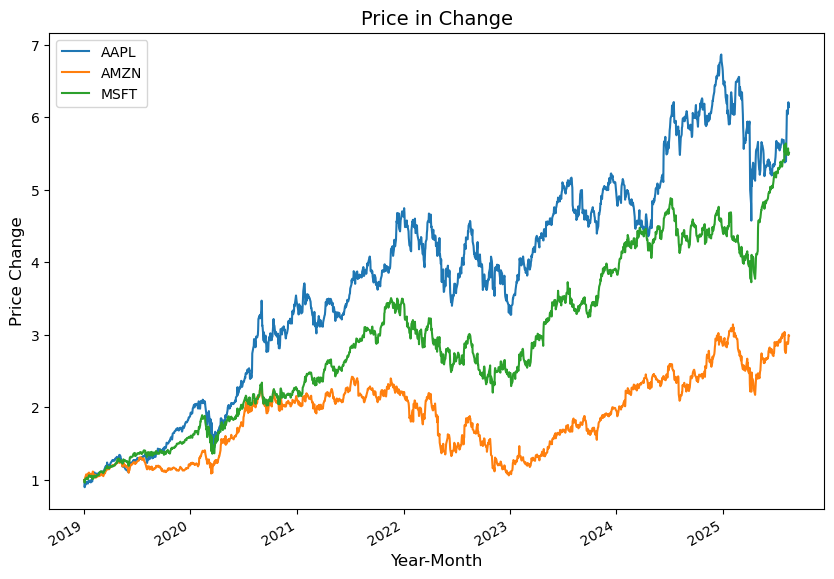

In [9]:
# Plot the absolute price series
plt.figure(figsize=(10,7))
(price_data['AAPL']/price_data['AAPL'].iloc[0]).plot()
(price_data['AMZN']/price_data['AMZN'].iloc[0]).plot()
(price_data['MSFT']/price_data['MSFT'].iloc[0]).plot()
# Set the title and axes label
plt.title('Price in Change', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Price Change', fontsize=12)
plt.legend()
# Show the plot
plt.show()

In [10]:
# url of the source
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

# Read and print the stock tickers that make up S&P500
tickers = pd.read_html(url)[0]

tickers.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [11]:
ticker_symbols = tickers['Symbol'].to_list()
# Clean the symbols
ticker_symbols = [ticker.replace(".","-") for ticker in ticker_symbols]

# Get the data for this tickers from yfinance
data = yf.download(ticker_symbols,'2000-1-1', auto_adjust=True)['Close']
data.head()

[*********************100%***********************]  503 of 503 completed

1 Failed download:
['RTX']: Timeout('Failed to perform, curl: (28) Operation timed out after 10002 milliseconds with 88915 bytes received. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,43.199886,0.840094,NaN,NaN,8.170223,1.215037,NaN,16.274672,27.847176,6.116468,...,11.113997,NaN,6.680135,17.568426,NaN,NaN,4.567843,NaN,25.027779,NaN
2000-01-04,39.899906,0.769266,NaN,NaN,7.936790,1.208433,NaN,14.909398,26.438435,6.052754,...,10.696477,NaN,6.833958,17.231918,NaN,NaN,4.476027,NaN,24.666668,NaN
2000-01-05,37.424885,0.780523,NaN,NaN,7.922200,1.320692,NaN,15.204174,26.824394,5.957187,...,11.263114,NaN,7.097649,18.171328,NaN,NaN,4.498981,NaN,25.138889,NaN
2000-01-06,35.999901,0.712977,NaN,NaN,8.199406,1.307485,NaN,15.328290,26.091055,5.989039,...,11.789985,NaN,7.031723,19.110748,NaN,NaN,4.460723,NaN,23.777779,NaN
2000-01-07,38.999897,0.746750,NaN,NaN,8.286941,1.380124,NaN,16.072985,26.824394,6.084611,...,11.402290,NaN,7.031723,19.054667,NaN,NaN,4.361256,NaN,23.513889,NaN


In [23]:
data_1h = yf.download(ticker_symbols, period='1y', interval='1h', auto_adjust=True, multi_level_index=False)

[*********************100%***********************]  503 of 503 completed


In [24]:
data_1h.dropna(inplace=True)
data_1h.head()

Price                           Close                                      \
Ticker                              A        AAPL        ABBV        ABNB   
Datetime                                                                    
2025-08-07 13:30:00+00:00  113.745003  218.270004  196.889999  121.224998   
2025-08-07 14:30:00+00:00  113.529999  219.628998  197.615005  120.855003   
2025-08-07 15:30:00+00:00  113.849998  219.914993  199.479996  119.464996   
2025-08-07 16:30:00+00:00  113.470001  218.710007  198.770004  118.160004   
2025-08-07 17:30:00+00:00  113.769997  219.500000  198.929993  117.750000   

Price                                                                     \
Ticker                            ABT       ACGL         ACN        ADBE   
Datetime                                                                   
2025-08-07 13:30:00+00:00  131.225006  88.839996  247.270004  344.149994   
2025-08-07 14:30:00+00:00  131.324997  88.195000  244.350006  338.454987   
2025-08-07 15:30:00+00:00  132.235001  88.035004  240.589996  334.700104   
2025-08-07 16:30:00+00:00  131.824997  88.209999  240.339996  333.010010   
2025-08-07 17:30:00+00:00  131.580002  88.750000  241.119995  333.329987   

Price                                             ...    Volume            \
Ticker                            ADI        ADM  ...        WY      WYNN   
Datetime                                          ...                       
2025-08-07 13:30:00+00:00  223.710007  56.830002  ...  389764.0  136962.0   
2025-08-07 14:30:00+00:00  223.210007  56.869999  ...  431311.0  134140.0   
2025-08-07 15:30:00+00:00  223.625000  57.525002  ...  379007.0  143737.0   
2025-08-07 16:30:00+00:00  223.039993  57.759998  ...  457201.0  142134.0   
2025-08-07 17:30:00+00:00  222.779999  57.830002  ...  191624.0  236918.0   

Price                                                                          \
Ticker                          XEL        XOM       XYL        XYZ       YUM   
Datetime                                                                        
2025-08-07 13:30:00+00:00  299985.0  2455460.0  122068.0  2537512.0  209415.0   
2025-08-07 14:30:00+00:00  213614.0  1876478.0   95890.0  1468874.0  190508.0   
2025-08-07 15:30:00+00:00  224924.0  1436485.0   64538.0  1161839.0  185329.0   
2025-08-07 16:30:00+00:00  157613.0  1020305.0   59524.0   898594.0  162596.0   
2025-08-07 17:30:00+00:00  174932.0   947289.0   54609.0  1109116.0  156738.0   

Price                                                     
Ticker                           ZBH      ZBRA       ZTS  
Datetime                                                  
2025-08-07 13:30:00+00:00  1327792.0  140089.0  979258.0  
2025-08-07 14:30:00+00:00   477568.0   83723.0  339076.0  
2025-08-07 15:30:00+00:00   395458.0   58398.0  307270.0  
2025-08-07 16:30:00+00:00   331114.0   34514.0  325060.0  
2025-08-07 17:30:00+00:00   348965.0   44718.0  273301.0  

[5 rows x 2515 columns]

In [25]:
# Aggregate function
ohlcv_dict = {'Open': 'first',
              'High': 'max',
              'Low': 'min',
              'Close': 'last',
              'Volume': 'sum'
             }

In [33]:
# Resample data to 4 hours data
data_msft_1h = data_msft_1m.resample('1H').agg(ohlcv_dict)

# Drop the missing values
data_msft_1h.dropna(inplace=True)

# Display the first 5 rows
data_msft_1h.head()

/var/folders/z5/d2ytmy3d2h18qcqwb9v71w2m0000gq/T/ipykernel_62976/633403601.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_msft_1h = data_msft_1m.resample('1H').agg(ohlcv_dict)


,Open,High,Low,Close,Volume
Datetime,,,,,
2025-08-11 13:00:00+00:00,522.460022,523.770020,519.719971,523.599976,2952921
2025-08-11 14:00:00+00:00,523.580017,525.219971,522.789978,525.034973,2027602
2025-08-11 15:00:00+00:00,525.015015,526.690002,524.049988,526.049988,1888192
2025-08-11 16:00:00+00:00,526.055115,527.549988,525.380005,525.780029,1272724
2025-08-11 17:00:00+00:00,525.799988,526.650024,523.419983,523.570007,1142173
